<h1>Importing the dataframe</h1>

Usamos o pacote pandas para importar o ficheiro cvs em formato DataFrame

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv ('dataset.csv')

<h1>Dataframe Analysis</h1>

<h3>Variables and data structures</h3>

In [9]:
df.info() # rows and their data structures

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14000 non-null  int64  
 1   temperature        13998 non-null  float64
 2   relitive_humidity  13999 non-null  float64
 3   light              13995 non-null  float64
 4   CO2                13999 non-null  float64
 5   absolute_humidity  13999 non-null  float64
 6   occupied           13999 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 765.8 KB


<h3>Data</h3>

In [10]:
df.head()   # in an initial evaluation, there are indications that the variable occupied will be the target 

,id,temperature,relitive_humidity,light,CO2,absolute_humidity,occupied
0,1,21.378188,25.525852,134.009125,586.057521,0.003686,0.0
1,2,19.827806,27.059169,132.640046,393.046090,0.003989,0.0
2,3,23.425627,31.104946,436.200084,1349.229342,0.005386,1.0
3,4,20.166031,31.384292,0.000000,477.423360,0.004294,0.0
4,5,21.156009,23.636922,192.408834,579.184588,0.003741,0.0


<h3>Correlation</h3>

In [11]:
df.corr().sort_index()  # correlation matrix gives away the target variable

,id,temperature,relitive_humidity,light,CO2,absolute_humidity,occupied
CO2,-0.001355,0.399512,0.299320,0.191636,1.000000,0.462635,0.501858
absolute_humidity,-0.007740,0.186489,0.890706,0.093850,0.462635,1.000000,0.262869
id,1.000000,-0.003755,-0.006547,-0.006751,-0.001355,-0.007740,0.000071
light,-0.006751,0.276728,-0.011742,1.000000,0.191636,0.093850,0.404337
occupied,0.000071,0.511966,0.056784,0.404337,0.501858,0.262869,1.000000
relitive_humidity,-0.006547,-0.133339,1.000000,-0.011742,0.299320,0.890706,0.056784
temperature,-0.003755,1.000000,-0.133339,0.276728,0.399512,0.186489,0.511966


To determine the independent variables that have the greatest correlation with the target variable (AKA. dependent variable), we resort to the follow block of code

In [12]:
corr = df.corr()
corr.occupied.abs().sort_values()    # With this, we verify that the variable ID has no real weight on the target variable

id                   0.000071
relitive_humidity    0.056784
absolute_humidity    0.262869
light                0.404337
CO2                  0.501858
temperature          0.511966
occupied             1.000000
Name: occupied, dtype: float64

This can also be visualized with a heat map

<AxesSubplot:>

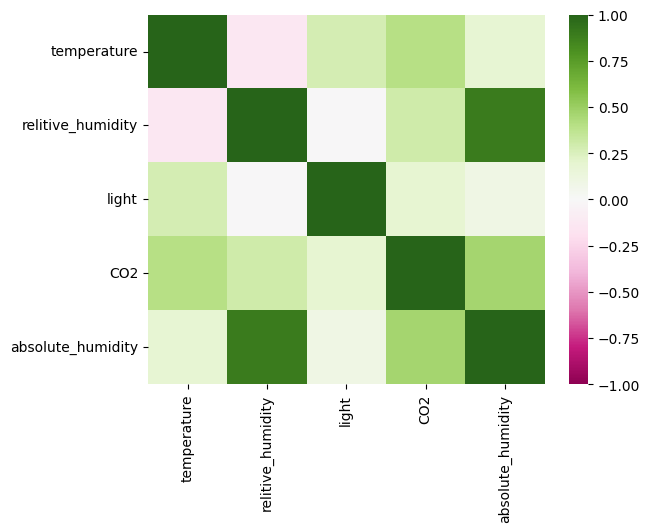

In [37]:
import seaborn as sns
sns.heatmap(df.corr(),vmin=-1, vmax=1, cmap="PiYG")

We filter our the less important variable

In [13]:
nomes = ['temperature', 'relitive_humidity', 'light', 'CO2', 'absolute_humidity', 'occupied']
df = df[nomes]
df.head()

,temperature,relitive_humidity,light,CO2,absolute_humidity,occupied
0,21.378188,25.525852,134.009125,586.057521,0.003686,0.0
1,19.827806,27.059169,132.640046,393.046090,0.003989,0.0
2,23.425627,31.104946,436.200084,1349.229342,0.005386,1.0
3,20.166031,31.384292,0.000000,477.423360,0.004294,0.0
4,21.156009,23.636922,192.408834,579.184588,0.003741,0.0


<h1>Dataframe data processing</h1>

For a better understanding of the variable, we change the target from 'occupied' to 'target'

In [15]:
df = df.rename(columns={"occupied":"target"})

We change the boolean value, before represented by a float, to a string 

In [17]:
df.target = df.target.map({0:'vacant', 1:'occupied'})

df.head()

,temperature,relitive_humidity,light,CO2,absolute_humidity,target
0,21.378188,25.525852,134.009125,586.057521,0.003686,vacant
1,19.827806,27.059169,132.640046,393.046090,0.003989,vacant
2,23.425627,31.104946,436.200084,1349.229342,0.005386,occupied
3,20.166031,31.384292,0.000000,477.423360,0.004294,vacant
4,21.156009,23.636922,192.408834,579.184588,0.003741,vacant


<h3>Not a number (NaN)</h3>

We first check the cases in where there are corrupted values

In [36]:
df.isnull().sum()

temperature          0
relitive_humidity    0
light                0
CO2                  0
absolute_humidity    0
target               0
dtype: int64

Because the target variable is categorical, we don't have a choice but to remove the rows that do not have a target specified.

In [20]:
df.dropna(inplace=True, subset=['target'])  # Retiramos os dados nulos do target 

As for the remaining NaN independent variables, we can fill these out with a mean of their other rows (but same attribute)

In [21]:
df = df.fillna(df.mean()) # Filling the NaN with a mean of other rows

C:\Users\ha_98\AppData\Local\Temp\ipykernel_17504\3703060463.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean()) # Filling the NaN with a mean of other rows


In [35]:
df.isnull().sum()

# There are no longer NaN instances

temperature          0
relitive_humidity    0
light                0
CO2                  0
absolute_humidity    0
target               0
dtype: int64

<h3>Duplicated rows</h3>


To avoid an overfitting of the Machine Learning algorithm, it is necessary that all duplicated rows be dealt with.

In [25]:
"Duplicated rows: " + str(df.duplicated().sum())

'Duplicated rows: 0'

As seen above, there are no duplicated rows.

<h3>Data balancing</h3>


As seen below, the dataframe is not properly balanced, having a greater number of vacant rows then its counter-part.

In [27]:
df.target.value_counts()

vacant      10759
occupied     3240
Name: target, dtype: int64


To mitigate this, we resort to the random partioning of data.

<h3>Data portioning - Spliting the dataframe</h3>


It is necessary that the dataframe be divided in two: for testing and training, having also a random_state attributed to this portioning.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df.drop('target', axis=1), df[['target']], test_size=0.30, random_state=999)  # We remove the target variable from the Xtrain and Xtest variables and remove the independent variables on the Ytrain and Ytest variables


<h1>Machine Learning Models</h1>

<h3>Logistic Regression</h3>

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()


We need to apply the 'ravel()' method to the values of Ytrain because the method 'fit' is expecting a 1D array but it's getting a dataframe with only a Y column.

In [34]:
model.fit(X=Xtrain, y=Ytrain.values.ravel())

LogisticRegression()

Before we continue to the model's metrics evaluation, we first must search for the optimal hiperparameters. Although LR does not really have any critical ones to tune, it is always a good idea to test them out.

In [50]:
from sklearn.model_selection import GridSearchCV
import numpy as np # linear algebra

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

search_model = GridSearchCV(model,param_grid=grid,cv=5)

We then train the search model to get the perfect LR model

In [63]:
import warnings; warnings.simplefilter('ignore') # remove warnings

search_model.fit(X=Xtrain,y=Ytrain.values.ravel())
best_LR_model = search_model.best_estimator_

0.8861904761904762

<h5>F1 Metric<h5>


To use the F1 metric, we first have to define the following variables

In [66]:
forecasts = best_LR_model.predict(X=Xtest) # forecast using the test data
probs = best_LR_model.predict_proba(X=Xtest)
probs = probs[:,1] # probability of the house being occupied

Para uma melhor organização de dados, colocamos as variáveis que necessitamos para a métrica em causa num dataframe novo

In [69]:
diagnistic = pd.DataFrame({'prob': probs, 'forecast' : forecasts, 'real' : Ytest.target})
diagnistic

,prob,forecast,real
10060,0.824318,vacant,occupied
4420,0.973771,vacant,vacant
5782,0.219127,occupied,vacant
4723,0.949216,vacant,vacant
13410,0.418183,occupied,vacant
...,...,...,...
3515,0.032415,occupied,occupied
3156,0.966508,vacant,vacant
4495,0.975947,vacant,vacant
10161,0.921716,vacant,vacant



Through the matrix of confusion, we can have an idea on how accurate the model is. The closer this matrix is to the identity matrix, the better.

In [71]:
print(pd.crosstab(diagnistic.real, diagnistic.forecast)) # confusion matrix

forecast  occupied  vacant
real                      
occupied       689     308
vacant         170    3033


To use the F1 metric, the following instruction is used.

In [72]:
from sklearn import metrics

É de notar que o parametro 'pos_label' tem que ser o valor considerado positivo

In [75]:
"F1 Metric: " + str(metrics.f1_score(y_true = diagnistic.real,y_pred=diagnistic.forecast, average='macro'))

'F1 Metric: 0.8347064433858866'

<h3>K Closest Neighbours</h3>


Because this model only works with numbers, we have to convert back our target variable from a categorical form to a nominal form.

In [76]:
from sklearn.preprocessing import LabelEncoder

In [79]:
le = LabelEncoder()
encoded_yteste = Ytest[Ytest.columns[:]].apply(le.fit_transform)
encoded_ytreino = Ytrain[Ytrain.columns[:]].apply(le.fit_transform)

In [81]:
encoded_yteste

,target
10060,0
4420,1
5782,1
4723,1
13410,1
...,...
3515,0
3156,1
4495,1
10161,1



The K closest neighbours is based on the distance between the data represende in an N dimention plane.

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()
scaler.fit_transform(Xtrain)
scaler.transform(Xtest)

array([[ 0.15581738, -1.16987951,  0.03363841,  0.44014146, -1.11421785],
       [-0.47881398,  0.68143121, -0.72816036,  0.16173058,  0.14748658],
       [ 0.23813741,  1.74894268,  0.50122728,  2.42383255,  1.9672476 ],
       ...,
       [-0.71188059, -0.5787875 , -0.72816036,  0.31868307, -0.45740215],
       [-0.69154424,  2.5195645 ,  0.51368037, -0.56334426,  1.4765762 ],
       [-0.83322684,  0.4562092 , -0.72816036,  0.16238333, -0.09736772]])

In [85]:
from sklearn.neighbors import KNeighborsClassifier


To determina the hiperplane K, we choose a good sample size and we iterate through the values to find a range to feed the GridSearch.

In [91]:
f1_list=[]
k_list=[]

for k in range(20, 60):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(Xtrain, Ytrain.values.ravel())
    pred=model.predict(Xtest)
    f=metrics.f1_score(Ytest, pred, average='macro')
    f1_list.append(f)
    k_list.append(k)

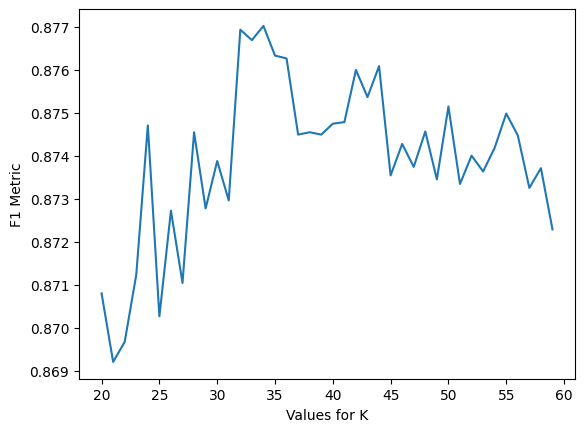

In [92]:
import matplotlib.pyplot as plt
plt.plot(k_list, f1_list)
plt.xlabel("Values for K")
plt.ylabel("F1 Metric")
plt.show()


With the graph above we can determine the best value for K is between 30 and 40. With these values, we can now use SearchGrid for the absolute best hiperparameter.

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
modelo = KNeighborsClassifier()

k_gama = list(range(30, 40))
params = dict(n_neighbors=k_gama)
  
# construindo o modelo para procurar os melhores parametros, com a métrica F1
search_model = GridSearchCV(model, params, cv=10, scoring='f1',verbose=1)
  
# treinando o modelo.
search_model.fit(Xtrain, encoded_ytreino.values.ravel()) # temos que usar ytreino nomial porque o método fit não está pronto para tratar valores categóricos
    	                                                    # encoded_ytreino é um dataframe de uma coluna binária


Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=59),
             param_grid={'n_neighbors': [30, 31, 32, 33, 34, 35, 36, 37, 38,
                                         39]},
             scoring='f1', verbose=1)

In [99]:
search_model.best_params_

{'n_neighbors': 39}

In [101]:
best_KN_model = search_model.best_estimator_

<h5>F1 Metric</h5>

With the F1 metric, we can now see that with K=39, the model has an accuracy rate of 87.4%

In [105]:
k = 39
best_KN_model = KNeighborsClassifier(n_neighbors = k)
best_KN_model.fit(Xtrain, Ytrain.values.ravel())
pred=best_KN_model.predict(Xtest)
f=metrics.f1_score(Ytest,pred,average='macro')
print("Accuracy rate for K = {} neighbours: {:.1f}%".format(k, f*100))

Accuracy rate for K = 39 neighbours: 87.4%


<h3>Decision tree</h3>

In [106]:
from sklearn.tree import DecisionTreeClassifier


We fit the model without any tunning to that we can compare the a tunned model.

In [107]:
model = DecisionTreeClassifier()
model.fit(X = Xtrain, y = Ytrain)

DecisionTreeClassifier()

In [109]:
pred=model.predict(Xtest)
metrics.f1_score(Ytest,pred,average='macro')

0.877600288795632

To find the best parameters, we use GridSearch

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
params = {'max_leaf_nodes': list(range(20, 40)), 'min_samples_split': [2, 3, 4,5,6], 'criterion': ['gini', 'entropy']}
search_model = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

In [112]:
search_model.fit(X = Xtrain, y = Ytrain)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                            29, 30, 31, 32, 33, 34, 35, 36, 37,
                                            38, 39],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             verbose=1)

With this, we can access the best parameters

In [114]:
search_model.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 39, 'min_samples_split': 2}

And get the optimal model with the paramters above

In [115]:
best_tree_model = search_model.best_estimator_

With a tunned model, we increased the accuracy rate by approximately 2%

In [117]:
pred=best_tree_model.predict(Xtest)
metrics.f1_score(Ytest,pred,average='macro') 

0.8933968654380678

<h1>Data not know to the models</h1><h3>The real test data<h3>

In [118]:
observations = pd.read_csv ('dataset_notclassified.csv')

Tratamento de dados

In [120]:
observations = observations.fillna(observations.mean())   # Preencher nos restantes dados nulos com a média da coluna (ou variável
observations[observations.duplicated(keep=False)] #Remover os duplicados
names = ['temperature', 'relitive_humidity', 'light', 'CO2', 'absolute_humidity']
observations = observations[names]

observations.head()

,temperature,relitive_humidity,light,CO2,absolute_humidity
0,21.946406,23.380909,0.000000,711.619659,0.003672
1,20.613036,32.561529,181.548129,513.492730,0.005278
2,24.562887,21.856165,194.585937,785.670802,0.004091
3,22.351602,22.146639,406.747835,852.136825,0.003315
4,21.972009,20.246332,866.766087,863.585786,0.003663


Dataframe processing

In [122]:
estimated_classification = best_tree_model.predict(observations)
df_class_est = pd.DataFrame(estimated_classification)
df_class_est.columns = ["occupied"]
df_class_est

,occupied
0,vacant
1,vacant
2,vacant
3,occupied
4,occupied
...,...
5555,vacant
5556,vacant
5557,vacant
5558,vacant


Export the estimated prespectives

In [ ]:
df_class_est.to_csv(
    path_or_buf='classificacao_estimada.csv',   #   onde guardar o ficheiro
    sep=',',            #   como separar as colunas
    na_rep='',          #   como rotular dados nulos
)